In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Loading Training Data
import pandas as pd
titanic_train = pd.read_csv("D:/PGA/kaggle/train.csv")
titanic_train.describe(include= object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McCoy, Miss. Agnes",male,347082,B96 B98,S
freq,1,577,7,4,644


In [26]:
# Loading Testing Data
titanic_test = pd.read_csv("D:/PGA/kaggle/test.csv")
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
# Loading Y var of test data
test_y = pd.read_csv("D:/PGA/kaggle/gender_submission.csv")
test_y.drop('PassengerId',axis = 1, inplace= True)
test_y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [28]:
#merging training and testing data
dataset =  pd.concat(objs=[titanic_train, titanic_test], axis=0).reset_index(drop=True)
dataset.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [29]:
#droping unwanted col
dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
dataset.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived'],
      dtype='object')

In [30]:
#checking for missing values
dataset.isnull().sum()
dataset.isna().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
dtype: int64

Age            0
Cabin       1014
Embarked       2
Fare           1
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
dtype: int64

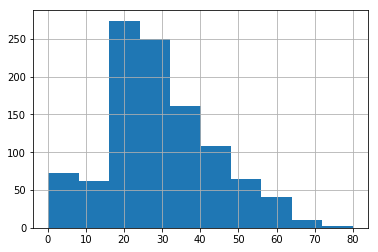

In [31]:
#making hist of a age col to handle missing val
dataset["Age"].hist()
#putting median because Age data is right skeweed
import numpy as np
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
dataset.isna().sum()

Age            0
Cabin       1014
Embarked       2
Fare           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
dtype: int64

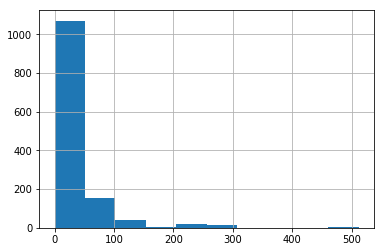

In [32]:
dataset["Fare"].hist()
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
dataset.isna().sum()

In [33]:
#immputing missing values to cat var
dataset['Embarked'].mode()
dataset['Embarked']= dataset['Embarked'].fillna('S')
dataset.isna().sum()

Age            0
Cabin       1014
Embarked       0
Fare           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
dtype: int64

In [34]:
# Replace the Cabin number by the type of cabin 'X' if not 
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])
np.unique(dataset["Cabin"])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age         1309 non-null float64
Cabin       1309 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 92.1+ KB


In [35]:
dataset = pd.get_dummies(dataset, columns = ['Cabin','Embarked','Sex'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
Age           1309 non-null float64
Fare          1309 non-null float64
Parch         1309 non-null int64
Pclass        1309 non-null int64
SibSp         1309 non-null int64
Survived      891 non-null float64
Cabin_A       1309 non-null uint8
Cabin_B       1309 non-null uint8
Cabin_C       1309 non-null uint8
Cabin_D       1309 non-null uint8
Cabin_E       1309 non-null uint8
Cabin_F       1309 non-null uint8
Cabin_G       1309 non-null uint8
Cabin_T       1309 non-null uint8
Cabin_X       1309 non-null uint8
Embarked_C    1309 non-null uint8
Embarked_Q    1309 non-null uint8
Embarked_S    1309 non-null uint8
Sex_female    1309 non-null uint8
Sex_male      1309 non-null uint8
dtypes: float64(3), int64(3), uint8(14)
memory usage: 79.3 KB


In [36]:
#spliting test and train
titanic_train, titanic_test = dataset[:891], dataset[891:]
#converting Survived into str
titanic_train['Survived'] = titanic_train['Survived'].astype(int)
#remvoving target var from test
test_x = titanic_test.drop('Survived', axis = 1)

In [37]:
train_y = titanic_train['Survived']
train_x = titanic_train.drop('Survived', axis= 1)
train_x.head()

,Age,Fare,Parch,Pclass,SibSp,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,7.2500,0,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,38.0,71.2833,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,26.0,7.9250,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,35.0,53.1000,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,35.0,8.0500,0,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [38]:
from sklearn.linear_model import LogisticRegression
#bulding a model
model = LogisticRegression()
model = model.fit (train_x,train_y)

In [39]:
#predicting a probabily of getting 1 
probability = model.predict_proba(test_x)
print('Probability:',probability)

Probability: [[0.89721586 0.10278414]
 [0.62711703 0.37288297]
 [0.91524356 0.08475644]
 [0.8948226  0.1051774 ]
 [0.4255938  0.5744062 ]
 [0.84188754 0.15811246]
 [0.34269847 0.65730153]
 [0.84254542 0.15745458]
 [0.22480556 0.77519444]
 [0.92409129 0.07590871]
 [0.89838468 0.10161532]
 [0.77365173 0.22634827]
 [0.06355551 0.93644449]
 [0.94884441 0.05115559]
 [0.07218067 0.92781933]
 [0.17565703 0.82434297]
 [0.80237005 0.19762995]
 [0.82155088 0.17844912]
 [0.44984235 0.55015765]
 [0.43330462 0.56669538]
 [0.79435458 0.20564542]
 [0.83313851 0.16686149]
 [0.10977999 0.89022001]
 [0.47677786 0.52322214]
 [0.07572479 0.92427521]
 [0.96302975 0.03697025]
 [0.03627193 0.96372807]
 [0.82931078 0.17068922]
 [0.62621956 0.37378044]
 [0.91336071 0.08663929]
 [0.9208232  0.0791768 ]
 [0.85987534 0.14012466]
 [0.54071266 0.45928734]
 [0.49355734 0.50644266]
 [0.58712833 0.41287167]
 [0.80800665 0.19199335]
 [0.38269214 0.61730786]
 [0.32486613 0.67513387]
 [0.88759535 0.11240465]
 [0.88284543

In [40]:
#make prediction
from sklearn.metrics import confusion_matrix
predicted = model.predict(test_x)
conf_mat = confusion_matrix(test_y, predicted)
print((conf_mat))

[[254  12]
 [  8 144]]


In [43]:
#generating report
from sklearn import metrics
report = metrics.classification_report(test_y, predicted)
print('Report:', report)

Report:               precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.95      0.94       152

   micro avg       0.95      0.95      0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [44]:
#printing accuracy
print('Accuracy:', model.score(test_x,test_y))

Accuracy: 0.9521531100478469


In [46]:
coefs=model.coef_[0]
top_three = np.argpartition(coefs, -3)[-3:]
print(train_x.columns[top_three])

Index(['Embarked_C', 'Sex_female', 'Cabin_E'], dtype='object')


In [47]:
np.argpartition(coefs, -3)
coefs

array([-0.03590679,  0.003287  , -0.09532973, -0.76858539, -0.31232524,
        0.20664699,  0.25166792, -0.20501835,  0.66897415,  1.04624731,
        0.68411672, -0.4885813 , -0.23587196, -0.31204209,  0.72550997,
        0.56849053,  0.32213888,  2.13658678, -0.52044739])